In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import tqdm
import os
print(os.listdir("../input"))
import glob
import cv2
import tensorflow as tf
from keras import layers
from keras.layers import Dropout , Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split
import keras.backend as K
from sklearn.utils import shuffle

['cell-images-for-detecting-malaria']


In [4]:
X_para = []
Y_para = []
from tqdm import tqdm

myfiles = glob.glob("../input/cell-images-for-detecting-malaria/cell_images/Parasitized/*.png")
img1 = []
image_yuv_list = []
for file in tqdm(myfiles):
    img1.append(cv2.resize(cv2.imread(file) , (120,120)))
    kernel = np.array([[0,-1,0],[-1,6,-1],[0,-1,0]])
    img = cv2.filter2D( cv2.resize(cv2.imread(file) , (120,120)) , -1 , kernel)
    image_yuv = cv2.cvtColor(img ,cv2.COLOR_BGR2YUV )
    image_yuv[: ,: , 0] = cv2.equalizeHist(image_yuv[:,:,0])
    image_yuv_list.append(image_yuv)
    image = cv2.cvtColor(image_yuv , cv2.COLOR_YUV2RGB)
    X_para.append(image)
    Y_para.append(1)
    

100%|██████████| 13779/13779 [03:20<00:00, 68.80it/s]


[ 5922   464  4530  2017  3731  5035 10701 11696 10185  5452]


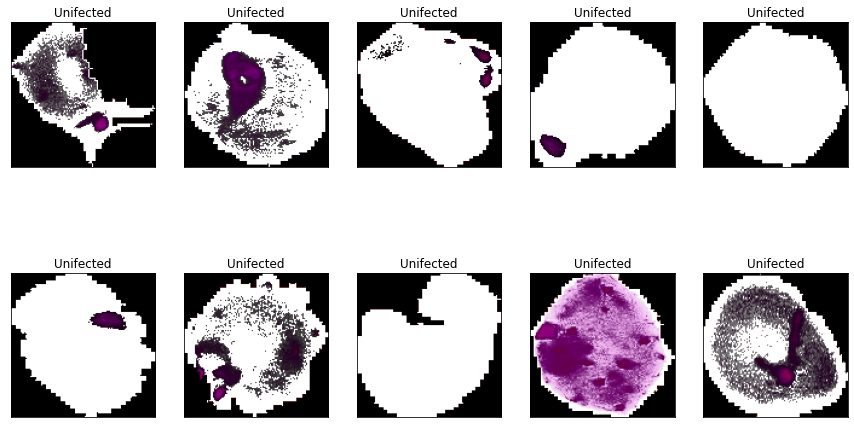

In [5]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
r = np.random.randint(0 , len(X_para) , 10)
print(r)
for i in range(10):
    n += 1 
    
    plt.subplot(2 , 5 , n)
    plt.subplots_adjust(hspace = 0.05 , wspace = 0.2)
    plt.imshow(X_para[r[i]])
    plt.title('Unifected' )
    plt.xticks([]) , plt.yticks([])
    
plt.show()

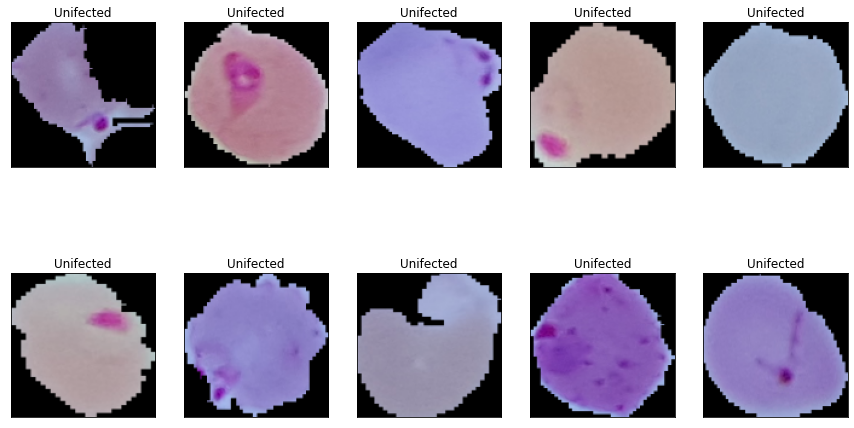

In [6]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(10):
    n += 1 
    
    plt.subplot(2 , 5 , n)
    plt.subplots_adjust(hspace = 0.05 , wspace = 0.2)
    plt.imshow(img1[r[i]])
    plt.title('Unifected' )
    plt.xticks([]) , plt.yticks([])
    
plt.show()

In [7]:
X_un , Y_un = [],[]
unfiles = glob.glob("../input/cell-images-for-detecting-malaria/cell_images/Uninfected/*.png")
img2list = []
for file in tqdm(unfiles):
    img2list.append(cv2.resize(cv2.imread(file) , (120,120)))
    kernel = np.array([[0,-1,0],[-1,6,-1],[0,-1,0]])
    img = cv2.filter2D( cv2.resize(cv2.imread(file) , (120,120)) , -1 , kernel)
    
    
    image_yuv = cv2.cvtColor(img ,cv2.COLOR_BGR2YUV )
    image_yuv[: ,: , 0] = cv2.equalizeHist(image_yuv[:,:,0])
    image = cv2.cvtColor(image_yuv , cv2.COLOR_YUV2RGB)
    X_un.append(image)
    Y_un.append(0)


100%|██████████| 13779/13779 [03:03<00:00, 75.02it/s]


[ 4247  7551 11820   762 11494  2869 13762  2521  4073  1922]


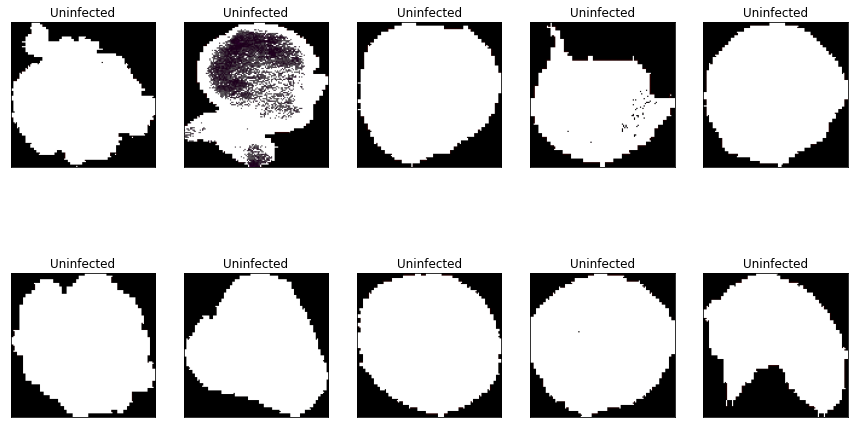

In [8]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
r = np.random.randint(0 , len(X_un) , 10)
print(r)
for i in range(10):
    n += 1 
    
    plt.subplot(2 , 5 , n)
    plt.subplots_adjust(hspace = 0.05 , wspace = 0.2)
    plt.imshow(X_un[r[i]])
    plt.title('Uninfected' )
    plt.xticks([]) , plt.yticks([])
    
plt.show()

[ 4247  7551 11820   762 11494  2869 13762  2521  4073  1922]


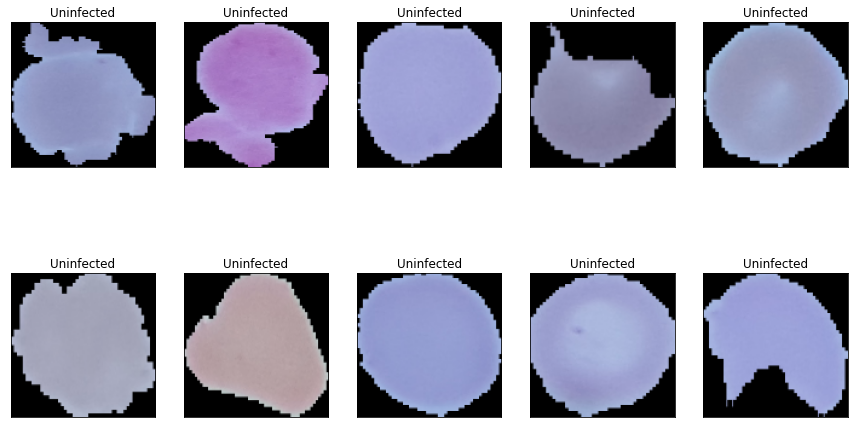

In [9]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
print(r)
for i in range(10):
    n += 1 
    
    plt.subplot(2 , 5 , n)
    plt.subplots_adjust(hspace = 0.05 , wspace = 0.2)
    plt.imshow(img2list[r[i]])
    plt.title('Uninfected' )
    plt.xticks([]) , plt.yticks([])
    
plt.show()

In [10]:
X = X_para + X_un
Y = Y_para + Y_un



In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3 , random_state =42)
X = np.array(X)

In [12]:
for x in [X_train,X_test,Y_train,Y_test]:
    print(len(x))


19290
8268
19290
8268


In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.applications.vgg16 import VGG16 
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential, Model 
from keras.applications import DenseNet201
from keras.initializers import he_normal
from keras.layers import Lambda, SeparableConv2D, BatchNormalization, Dropout, MaxPooling2D, Input, Dense, Conv2D, Activation, Flatten 
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [14]:

model1 = keras.Sequential()

# First Conv block
model1.add(Conv2D(16 , (3,3) , padding = 'same' , activation = 'relu' , input_shape = (120,120,3)))
model1.add(Conv2D(16 , (3,3), padding = 'same' , activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))

# Second Conv block
model1.add(SeparableConv2D(32, (3,3), activation = 'relu', padding = 'same'))
model1.add(SeparableConv2D(32, (3,3), activation = 'relu', padding = 'same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2)))

# Third Conv block
model1.add(SeparableConv2D(64, (3,3), activation = 'relu', padding = 'same'))
model1.add(SeparableConv2D(64, (3,3), activation = 'relu', padding = 'same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2)))

# Forth Conv block
model1.add(SeparableConv2D(128, (3,3), activation = 'relu', padding = 'same'))
model1.add(SeparableConv2D(128, (3,3), activation = 'relu', padding = 'same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout(0.2))

# Fifth Conv block 
model1.add(SeparableConv2D(256, (3,3), activation = 'relu', padding = 'same'))
model1.add(SeparableConv2D(256, (3,3), activation = 'relu', padding = 'same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout(0.2))


# FC layer 
model1.add(Flatten())
model1.add(Dense(units = 512 , activation = 'tanh'))
model1.add(Dropout(0.7))
model1.add(Dense(units = 128 , activation = 'tanh'))
model1.add(Dropout(0.5))
model1.add(Dense(units = 64 , activation = 'tanh'))
model1.add(Dropout(0.3))

# Output layer
model1.add(Dense(units = 2 , activation = 'softmax'))

# Compile
model1.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
model1.summary()

# Implement callbacks 
checkpoint = ModelCheckpoint(filepath='best_model.hdf5', save_best_only=True, save_weights_only=False)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=3, verbose = 1, mode='min', restore_best_weights = True)
learning_rate_reduction = ReduceLROnPlateau(
    monitor = 'val_accuracy', 
    patience = 2, 
    verbose = 1, 
    factor = 0.3, 
    min_lr = 0.000001)

# Train
history1 = model1.fit(np.array(X_train) ,np.array(Y_train) , epochs = 20 ,validation_split = 0.3, callbacks=[learning_rate_reduction])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 120, 120, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 16)        0         
_________________________________________________________________
separable_conv2d (SeparableC (None, 60, 60, 32)        688       
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 60, 60, 32)        1344      
_________________________________________________________________
batch_normalization (BatchNo (None, 60, 60, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0

KeyboardInterrupt: 

In [15]:
mcp = ModelCheckpoint(filepath='model_check_path.hdf5',monitor="val_acc", save_best_only=True, save_weights_only=False)
history1 = model1.fit(np.array(X_train) ,np.array(Y_train) , epochs = 3 ,validation_split = 0.3, callbacks=[learning_rate_reduction ,mcp])


Epoch 1/3
422/422 [==============================] - 277s 657ms/step - loss: 0.0964 - accuracy: 0.9674 - val_loss: 0.1607 - val_accuracy: 0.9521
Epoch 2/3
422/422 [==============================] - 278s 660ms/step - loss: 0.0956 - accuracy: 0.9690 - val_loss: 0.1607 - val_accuracy: 0.9520
Epoch 3/3
422/422 [==============================] - 280s 664ms/step - loss: 0.0929 - accuracy: 0.9698 - val_loss: 0.1605 - val_accuracy: 0.9521


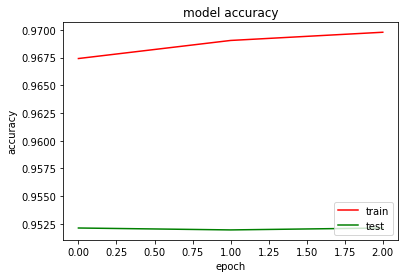

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(history1.history['accuracy'], color='red')
ax.plot(history1.history['val_accuracy'], color ='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [17]:
y_pre = model1.predict(np.array(X_test))


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


0.0

In [20]:
#model1.load_weights('model_check_path.hdf5')


In [23]:
from sklearn.metrics import classification_report
pred = model1.predict(np.array(X_test))



In [24]:
pred[0]

array([0.00387344, 0.9961266 ], dtype=float32)

In [29]:
Y_test[1]

1

In [33]:
import sklearn
sklearn.metrics.accuracy_score(Y_test,np.argmax(pred, axis = 1))

0.954644412191582

In [30]:
print(classification_report(Y_test,np.argmax(pred, axis = 1)))


              precision    recall  f1-score   support

           0       0.94      0.97      0.96      4122
           1       0.97      0.93      0.95      4146

    accuracy                           0.95      8268
   macro avg       0.96      0.95      0.95      8268
weighted avg       0.96      0.95      0.95      8268

